# **Telecom Customer Churn Analysis**

**Project Type- Supervised Learning(Classification)**

**Contribution- Individual**

**Name- Vikash Kumar Diwakar**

# **Project Workflow:**

* **Importing Neccessary Libraries**

* **Data Wrangling**

1. Gathering Data
* CSV and others files
* APIs
* Web Scraping
* Databases
2. Assessing Data
3. Cleaning Data
* **EDA and Features Engineering on features**

* **Features Transformation and selection**

* **Remove Multicollinearity**

* **model implementation and pre-processing**

1. Train, Test and Split
2. preprocessing using column-transformer
* **Fitting the regression models and HyperParameter Tuning**

* **Final selection of the model**

* **Conclusion**

# **Problem Statement**

Customer churn is when a company’s customers stop doing business with that
company. Businesses are very keen on measuring churn because keeping an
existing customer is far less expensive than acquiring a new customer. New
business involves working leads through a sales funnel, using marketing and
sales budgets to gain additional customers. Existing customers will often have a
higher volume of service consumption and can generate additional customer
referrals.

Customer retention can be achieved with good customer service and products.
But the most effective way for a company to prevent attrition of customers is to
truly know them. The vast volumes of data collected about customers can be
used to build churn prediction models. Knowing who is most likely to defect
means that a company can prioritise focused marketing efforts on that subset of
their customer base.

Preventing customer churn is critically important to the telecommunications
sector, as the barriers to entry for switching services are so low.
You will examine customer data from IBM Sample Data Sets with the aim of
building and comparing several customer churn prediction models.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '/content/Telecom_customer_churn.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
binary_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in binary_columns:
  df[col] = label_encoder.fit_transform(df[col])

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


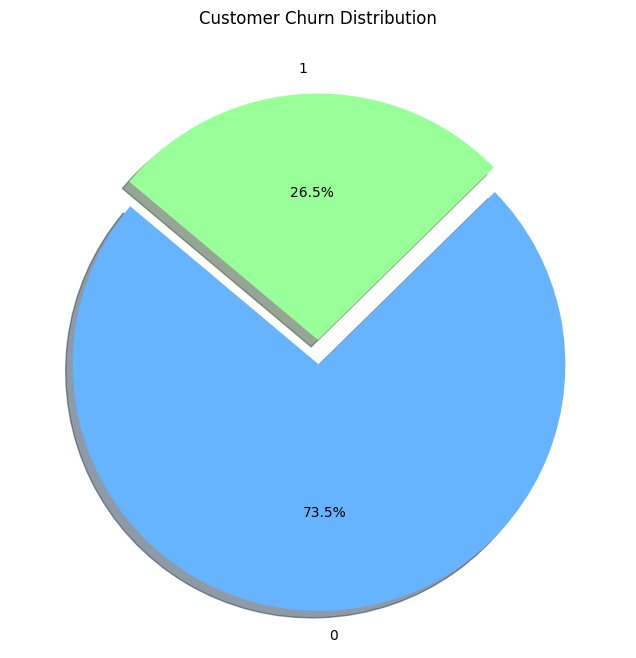

In [11]:
# Pie Chart with Explode
labels = df['Churn'].value_counts().index
sizes = df['Churn'].value_counts().values
explode = (0.1, 0)  # explode the first slice (Churn = Yes)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=['#66b3ff', '#99ff99'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Customer Churn Distribution')
plt.show()

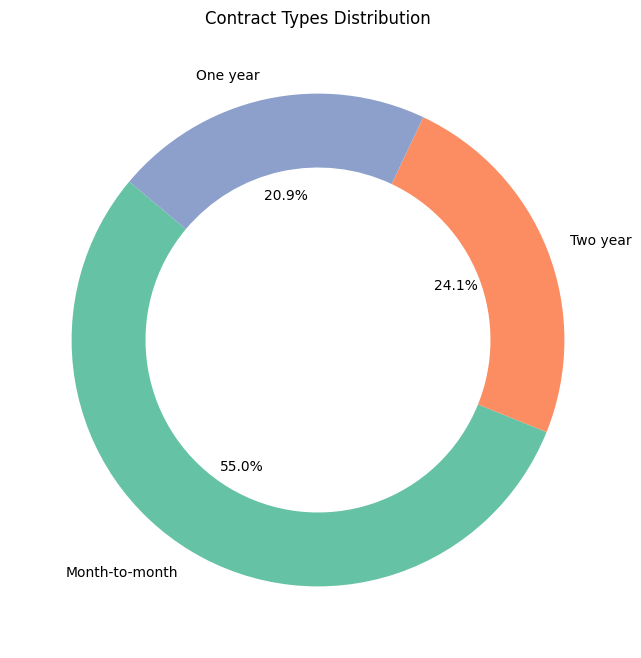

In [12]:
# Donut Chart
labels = df['Contract'].value_counts().index
sizes = df['Contract'].value_counts().values
colors = sns.color_palette('Set2')

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Contract Types Distribution')
plt.show()

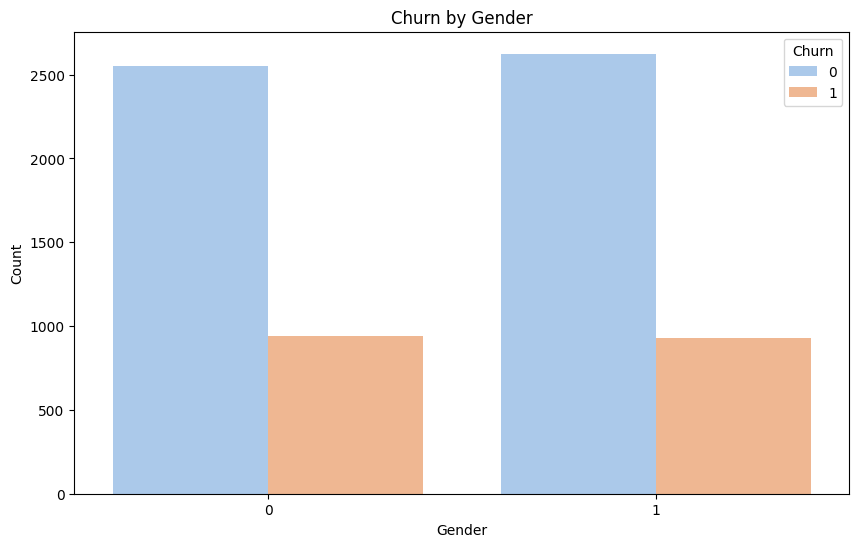

In [13]:
# Bar Chart - Churn by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='Churn', data=df, palette='pastel')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

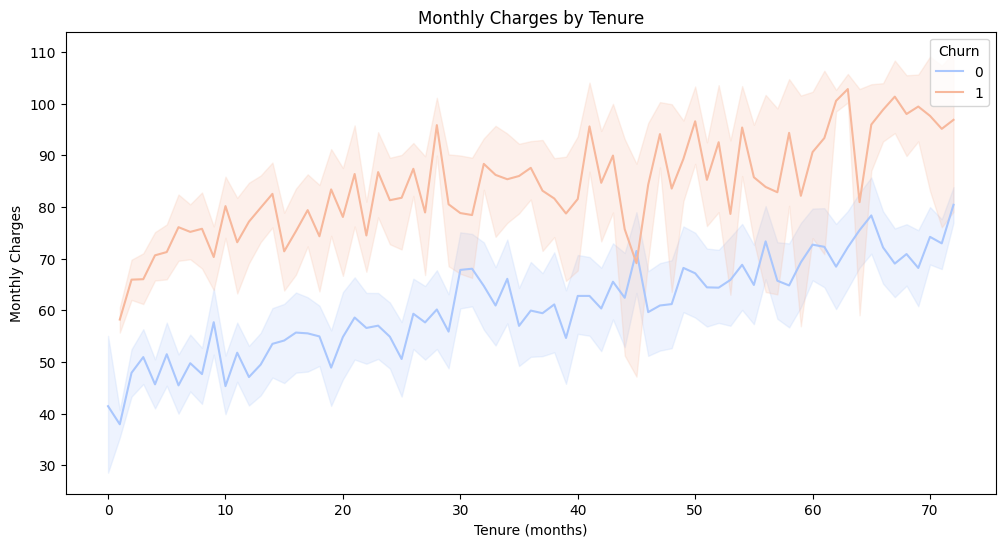

In [14]:
# Line Chart - Monthly Charges by Tenure
plt.figure(figsize=(12, 6))
sns.lineplot(x='tenure', y='MonthlyCharges', data=df, hue='Churn', palette='coolwarm')
plt.title('Monthly Charges by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.show()

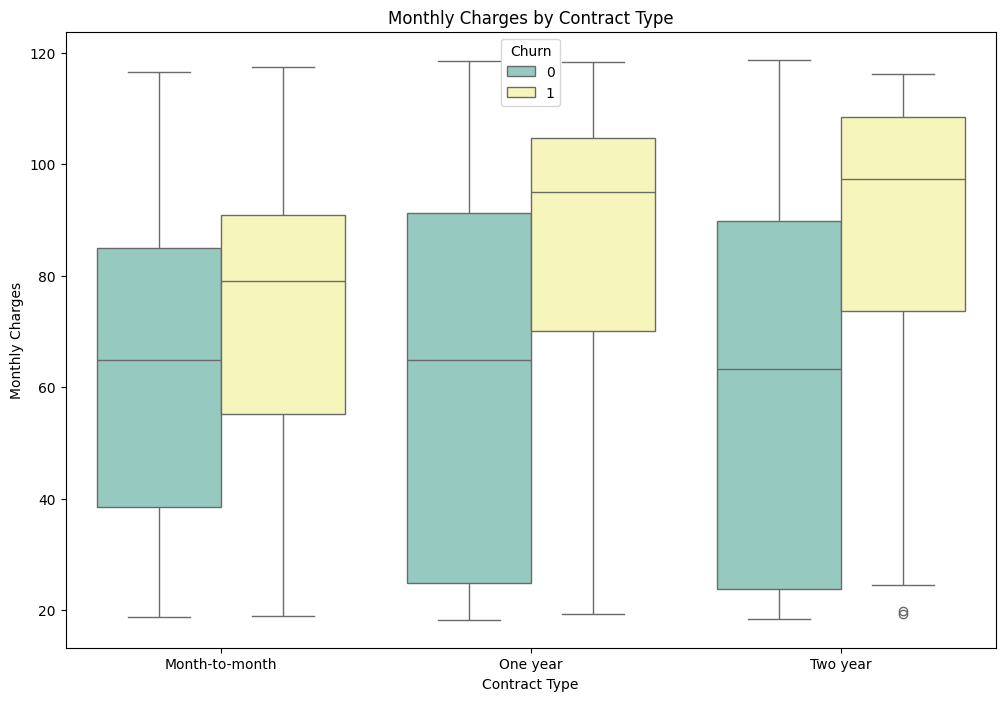

In [15]:
# Box Plot - Monthly Charges by Contract Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df, palette='Set3')
plt.title('Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.show()

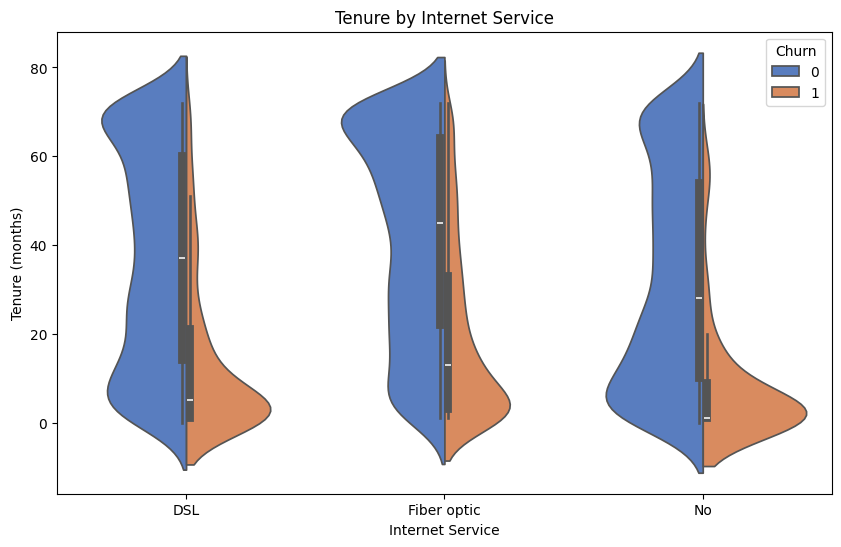

In [16]:
# Violin Plot - Tenure by Internet Service
plt.figure(figsize=(10, 6))
sns.violinplot(x='InternetService', y='tenure', hue='Churn', data=df, split=True, palette='muted')
plt.title('Tenure by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Tenure (months)')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


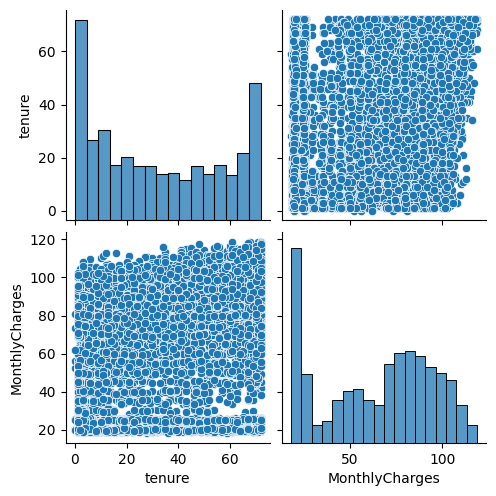

In [17]:
# Pair Plot - Selected Numerical Variables
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges']], palette='husl')
plt.show()

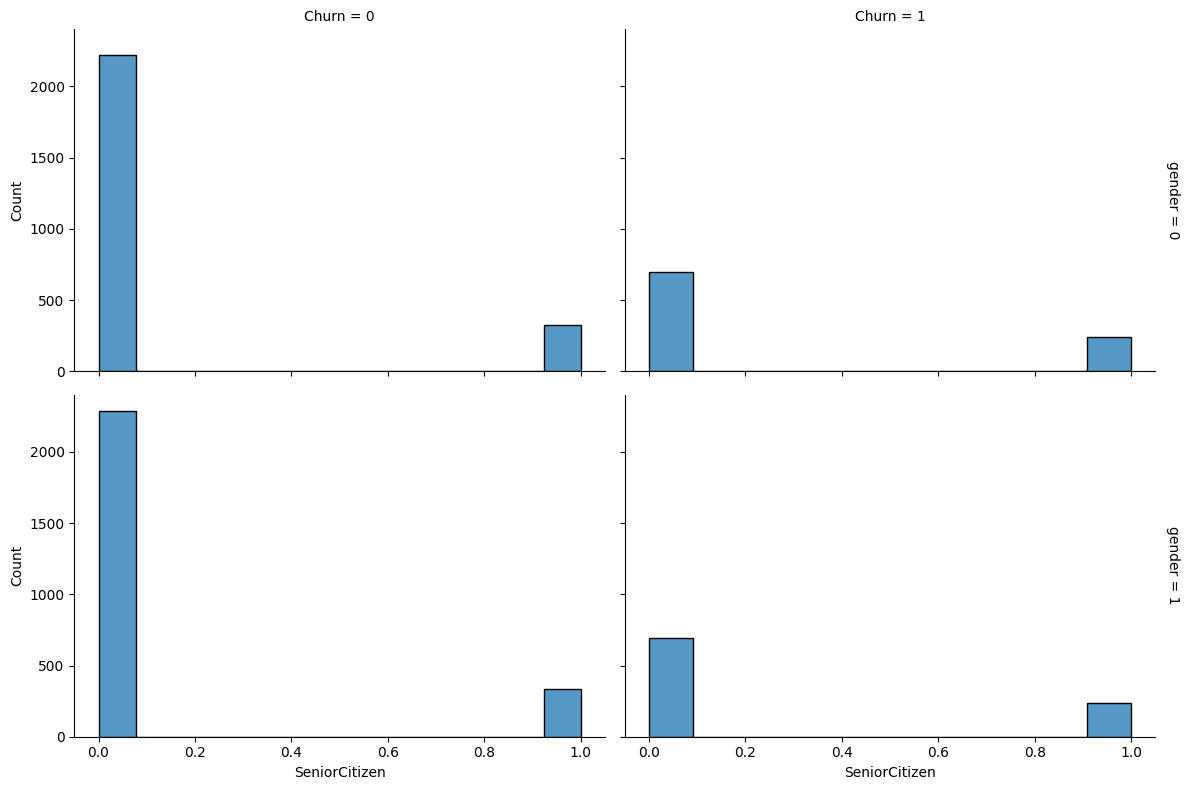

In [18]:
# Facet Grid - Churn by Senior Citizen and Gender
g = sns.FacetGrid(df, col='Churn', row='gender', margin_titles=True, height=4, aspect=1.5, palette='plasma')
g.map(sns.histplot, 'SeniorCitizen', kde=False)
plt.show()

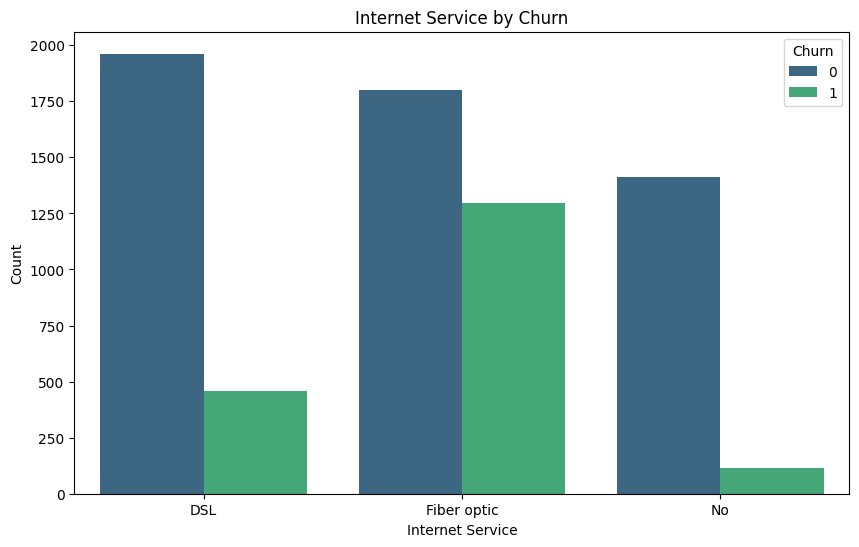

In [19]:
# Count Plot - Internet Service by Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='viridis')
plt.title('Internet Service by Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

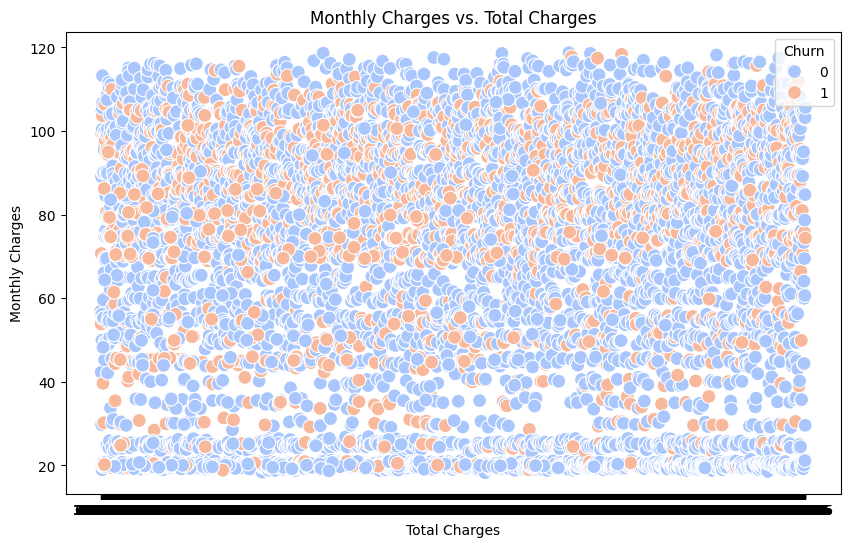

In [20]:
# Scatter Plot - Monthly Charges vs. Total Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', hue='Churn', data=df, palette='coolwarm', s=100)
plt.title('Monthly Charges vs. Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')
plt.show()

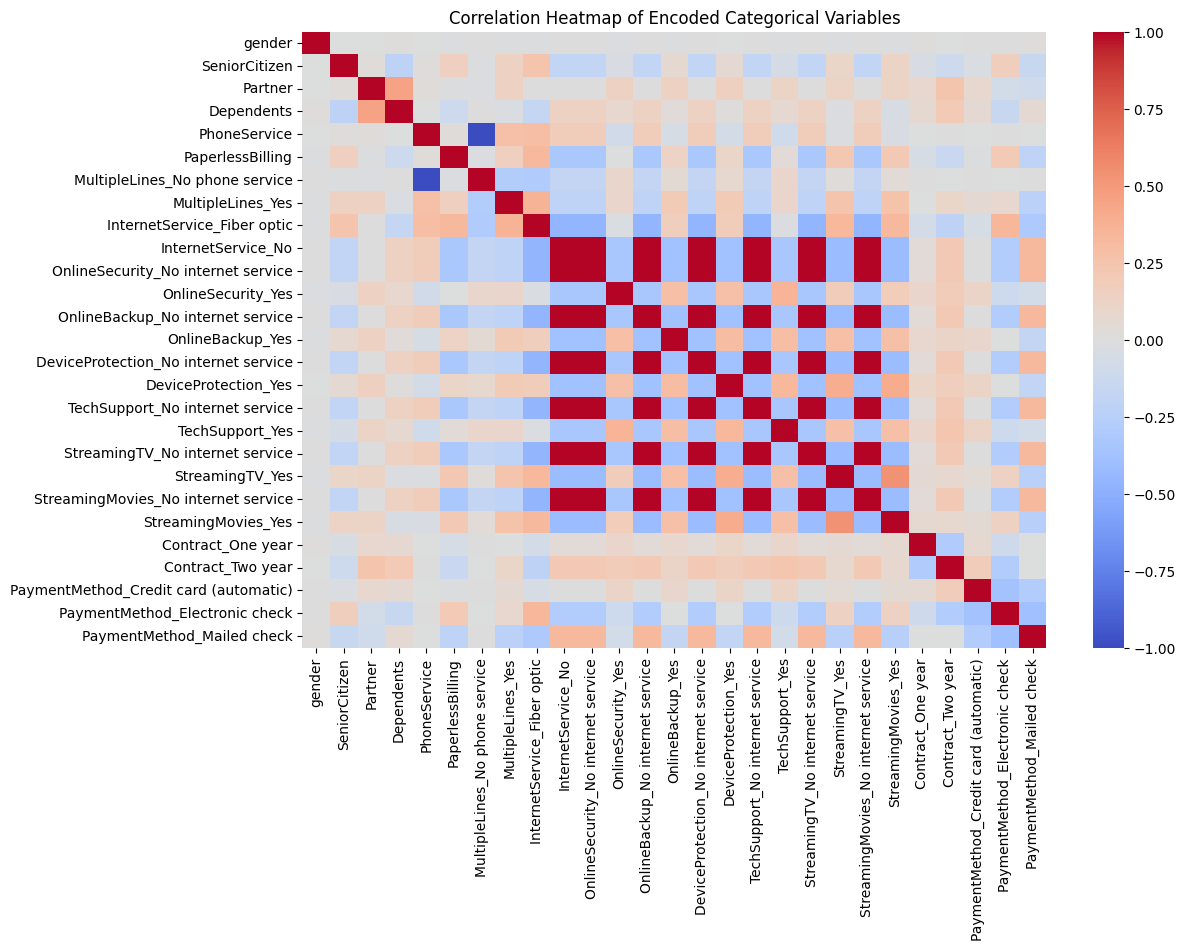

In [21]:
# Heatmap for Categorical Variables
df_categorical = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]
df_encoded = pd.get_dummies(df_categorical, drop_first=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Encoded Categorical Variables')
plt.show()

In [22]:
# Convert columns to numeric, forcing errors to NaN
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with NaN values in these columns (if any)
df.dropna(subset=['tenure', 'MonthlyCharges', 'TotalCharges'], inplace=True)

In [23]:
# Check if there are any non-numeric values left
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].dtypes)

# If you suspect specific values (like spaces, empty strings), replace them:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object


In [24]:
# Calculate Z-scores for the numerical columns
from scipy.stats import zscore

df['tenure_z'] = zscore(df['tenure'])
df['MonthlyCharges_z'] = zscore(df['MonthlyCharges'])
df['TotalCharges_z'] = zscore(df['TotalCharges'])

# Filter out rows where Z-score is beyond 3 standard deviations
df = df[(df['tenure_z'].abs() <= 3) & (df['MonthlyCharges_z'].abs() <= 3) & (df['TotalCharges_z'].abs() <= 3)]

# Drop the Z-score columns after filtering
df.drop(columns=['tenure_z', 'MonthlyCharges_z', 'TotalCharges_z'], inplace=True)

In [25]:
df['MultipleLines'].value_counts()

,count
MultipleLines,
No,3385
Yes,2967
No phone service,680


In [26]:
df = pd.get_dummies(df,columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod'],drop_first=True,dtype=int)

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0


In [28]:
pd.set_option('display.max_columns', None)

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int64  
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int64  
 4   Dependents                             7032 non-null   int64  
 5   tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   int64  
 7   PaperlessBilling                       7032 non-null   int64  
 8   MonthlyCharges                         7032 non-null   float64
 9   TotalCharges                           7032 non-null   float64
 10  Churn                                  7032 non-null   int64  
 11  MultipleL

In [31]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int64  
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int64  
 4   Dependents                             7032 non-null   int64  
 5   tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   int64  
 7   PaperlessBilling                       7032 non-null   int64  
 8   MonthlyCharges                         7032 non-null   float64
 9   TotalCharges                           7032 non-null   float64
 10  Churn                                  7032 non-null   int64  
 11  MultipleL

In [33]:
df = df.drop(columns=['customerID'])

In [34]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
PaperlessBilling,0
MonthlyCharges,0
TotalCharges,0
Churn,0


In [35]:
df['TotalCharges'].fillna(round(df['TotalCharges'].mean(),2),inplace=True)

<Axes: xlabel='Churn', ylabel='count'>

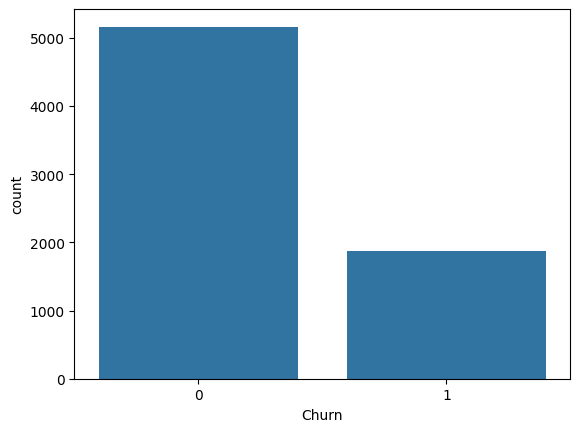

In [36]:
import seaborn as sns
sns.countplot(x='Churn', data=df)

In [37]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'Churn')], df['Churn'])

print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 7032
Resampled balanced dataset shape 10326


In [38]:
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'Churn'))

In [39]:
#adding target variable to new created dataframe
balanced_df['Churn'] = y_smote

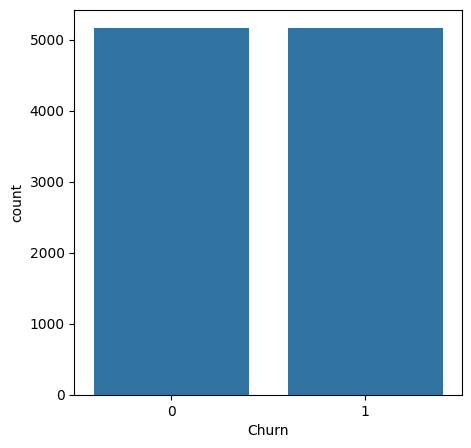

In [40]:
#check for class imbalance
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.countplot( x=balanced_df['Churn'],data=balanced_df);

In [41]:
balanced_df.shape

(10326, 31)

In [42]:
X = balanced_df.drop(columns=['Churn'])
y = balanced_df['Churn']

In [43]:
X.shape

(10326, 30)

In [44]:
y.shape

(10326,)

# **Data Transformation**

In [45]:
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# **Train Test Splitting**

In [46]:
#importing libraries for splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [47]:
X_train.shape

(8260, 30)

In [48]:
X_test.shape

(2066, 30)

# **Base Line Model Implementation**

# **`Logistic Regression`**

In [49]:
#importing logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

In [50]:
#fitting data into Logistic Regression
logi = LogisticRegression()
logi.fit(X_train,y_train)

LogisticRegression()

In [51]:
#class prediction of y
y_pred_logi = logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)

In [52]:
#getting all scores for Logistic Regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 3)
roc_score_logi = round(roc_auc_score(y_pred_logi,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.837
The accuracy on test data is  0.834
The precision on test data is  0.845
The recall on test data is  0.826
The f1 on test data is  0.836
The roc_score on test data is  0.835


[[854 183]
 [159 870]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

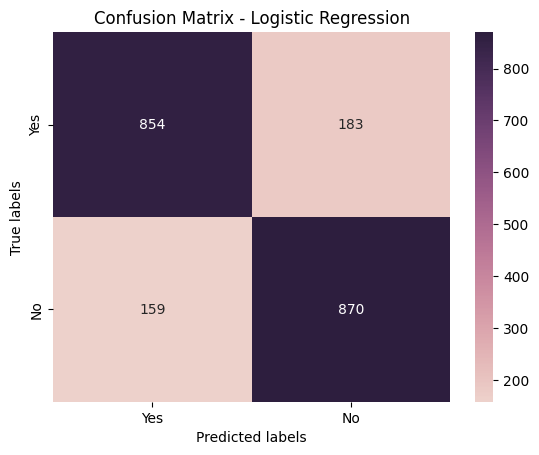

In [53]:
# Get the confusion matrix
labels = [ 'Yes','No']
cm_logi = confusion_matrix(y_test, y_pred_logi )
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax, fmt = 'd', cmap=sns.cubehelix_palette(as_cmap=True))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **`Decision Tree Classifier`**

In [54]:
# importing decisiontree
from sklearn.tree import DecisionTreeClassifier

In [55]:
# creating object anf fitting the model
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
# class predicting y
y_pred_dtc=dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [57]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 3)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 3)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 3)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 3)
roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  0.999
The accuracy on test data is  0.797
The precision on test data is  0.808
The recall on test data is  0.789
The f1 on test data is  0.798
The roc_score on test data is  0.797


[[815 222]
 [198 831]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

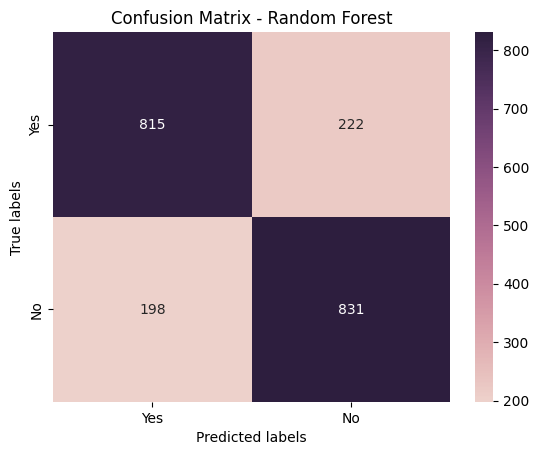

In [58]:
# Get the confusion matrix
labels = ['Yes', 'No']
cm_dtc = confusion_matrix(y_test, y_pred_dtc )
print(cm_dtc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, ax = ax,fmt = 'd',  cmap=sns.cubehelix_palette(as_cmap=True))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **`Random Forest Classifier`**

In [59]:
# importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [60]:
# creating object and fitting the model
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
# class predicting y
y_pred_rfc = rfc.predict(X_test)
y_train_pred_rfc = rfc.predict(X_train)

In [62]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  0.999
The accuracy on test data is  0.837
The precision on test data is  0.843
The recall on test data is  0.833
The f1 on test data is  0.838
The roc_score on test data is  0.837


[[863 174]
 [162 867]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

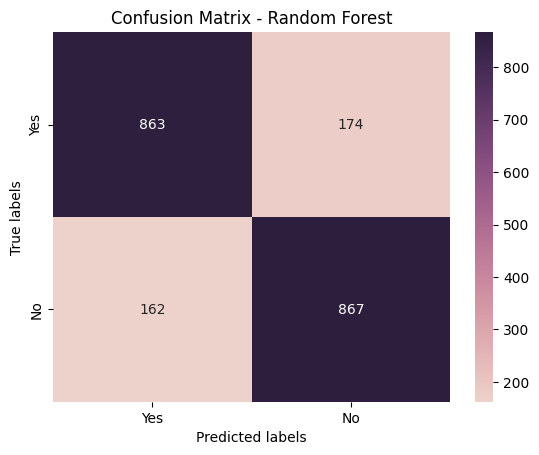

In [63]:
# Get the confusion matrix
labels = ['Yes', 'No']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, fmt = 'd',ax = ax, cmap=sns.cubehelix_palette(as_cmap=True))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **`Gradient Boosting Classifier`**

In [64]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
#fitting data into Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [66]:
#class prediction of y
y_pred_gbc=gbc.predict(X_test)
y_train_pred_gbc=gbc.predict(X_train)

In [67]:
#getting all scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train), 3)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test), 3)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test), 3)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test), 3)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test), 3)
roc_score_gbc = round(roc_auc_score(y_pred_gbc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  0.851
The accuracy on test data is  0.83
The precision on test data is  0.857
The recall on test data is  0.811
The f1 on test data is  0.834
The roc_score on test data is  0.831


[[832 205]
 [147 882]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

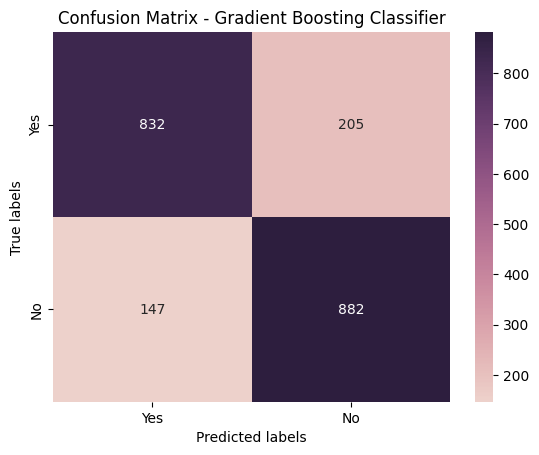

In [68]:
# Get the confusion matrix for Gradient Boosting Classifier
labels = ['Yes', 'No']
cm_gbc = confusion_matrix(y_test, y_pred_gbc )
print(cm_gbc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_gbc, annot=True, ax = ax, fmt = 'd',  cmap=sns.cubehelix_palette(as_cmap=True))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Gradient Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **`XG Boosting Classifier`**

In [69]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier

In [70]:
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
#class prediction of y
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)

In [72]:
#getting all scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train), 3)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test), 3)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test), 3)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test), 3)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test), 3)
roc_score_xgb = round(roc_auc_score(y_pred_xgb,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  0.958
The accuracy on test data is  0.833
The precision on test data is  0.838
The recall on test data is  0.829
The f1 on test data is  0.833
The roc_score on test data is  0.833


[[859 178]
 [167 862]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

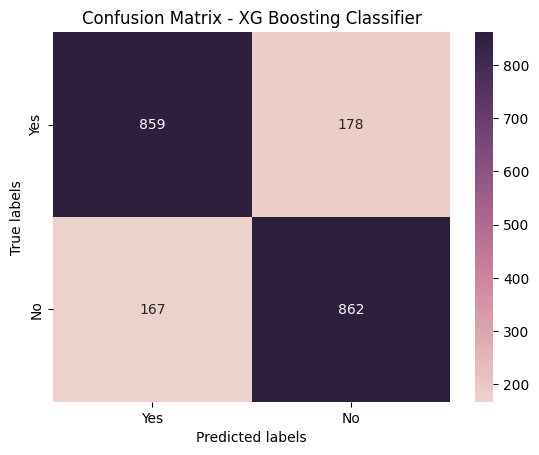

In [73]:
# Get the confusion matrix for Gradient Boosting Classifier
labels = ['Yes', 'No']
cm_xgb = confusion_matrix(y_test, y_pred_xgb )
print(cm_xgb)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_xgb, annot=True, ax = ax, fmt = 'd', cmap=sns.cubehelix_palette(as_cmap=True))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - XG Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **BaseLine Model Comparison**

In [74]:
all_lassifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XG Boosting']
all_train_accuracy = [train_accuracy_logi, train_accuracy_dtc, train_accuracy_rfc, train_accuracy_gbc, train_accuracy_xgb]
all_test_accuracy = [accuracy_logi, accuracy_dtc, accuracy_rfc, accuracy_gbc, accuracy_xgb]
all_precision_score = [precision_score_logi, precision_score_dtc, precision_score_rfc, precision_score_gbc, precision_score_xgb]
all_recall_score = [recall_score_logi, recall_score_dtc, recall_score_rfc,recall_score_gbc, recall_score_xgb]
all_f1_score = [f1_score_logi, f1_score_dtc, f1_score_rfc, f1_score_gbc, f1_score_xgb]
all_auc_score = [roc_score_logi, roc_score_dtc, roc_score_rfc,roc_score_gbc, roc_score_xgb]

In [75]:
compare_df = pd.DataFrame({'Classifier':all_lassifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})

In [76]:
compare_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.837,0.834,0.845,0.826,0.836,0.835
1,Decision Tree,0.999,0.797,0.808,0.789,0.798,0.797
2,Random Forest,0.999,0.837,0.843,0.833,0.838,0.837
3,Gradient Boosting,0.851,0.830,0.857,0.811,0.834,0.831
4,XG Boosting,0.958,0.833,0.838,0.829,0.833,0.833


In [77]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
2,Random Forest,0.999,0.837,0.843,0.833,0.838,0.837
0,Logistic Regression,0.837,0.834,0.845,0.826,0.836,0.835
4,XG Boosting,0.958,0.833,0.838,0.829,0.833,0.833
3,Gradient Boosting,0.851,0.830,0.857,0.811,0.834,0.831
1,Decision Tree,0.999,0.797,0.808,0.789,0.798,0.797


# **Combined ROC curve for all the models**

In [78]:
#importing roc curve
from sklearn.metrics import roc_curve

In [79]:
#probabilty prediction of y for all model
y_pred_proba_logi = logi.predict_proba(X_test)[:,1]
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
y_pred_proba_gbc = gbc.predict_proba(X_test)[:,1]
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

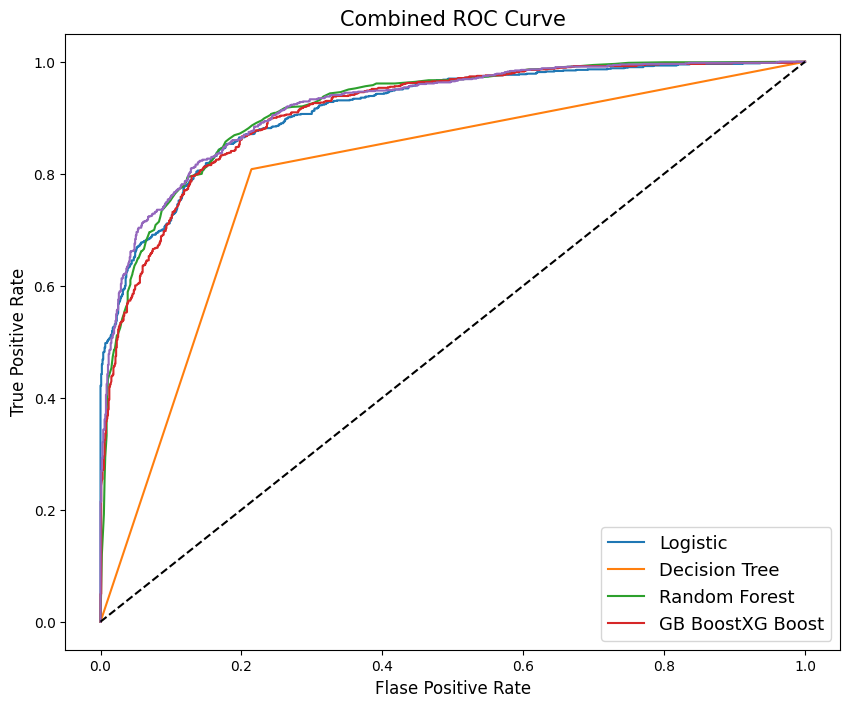

In [80]:
fig = plt.figure(figsize=(10,8))

fpr_logi, tpr_logi, _logi = roc_curve(y_test,  y_pred_proba_logi)
fpr_dtc, tpr_dtc, _dtc = roc_curve(y_test,  y_pred_proba_dtc)
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rfc)
fpr_gbc, tpr_gbc, _gbc = roc_curve(y_test,  y_pred_proba_gbc)
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test,  y_pred_proba_xgb)

plt.plot(fpr_logi, tpr_logi)
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_gbc, tpr_gbc)
plt.plot(fpr_xgb, tpr_xgb)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("Flase Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Logistic", "Decision Tree", "Random Forest", "GB Boost" "XG Boost"], prop={'size':13}, loc='lower right' )

# **Feature Importance On Random Forest Model**

In [81]:
features = list(i for i in list(balanced_df.describe(include='all').columns) if i != 'Churn')
features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [82]:
feature_importances_rfc = rfc.feature_importances_

In [83]:
feature_importances_rfc_df = pd.Series(feature_importances_rfc, index=features)

In [84]:
feature_importances_rfc_df.sort_values(ascending=False)

,0
TotalCharges,0.143376
tenure,0.140179
MonthlyCharges,0.133014
Contract_Two year,0.057977
TechSupport_Yes,0.055244
OnlineSecurity_Yes,0.050642
Contract_One year,0.042322
InternetService_Fiber optic,0.031136
Dependents,0.028388
OnlineBackup_Yes,0.027488


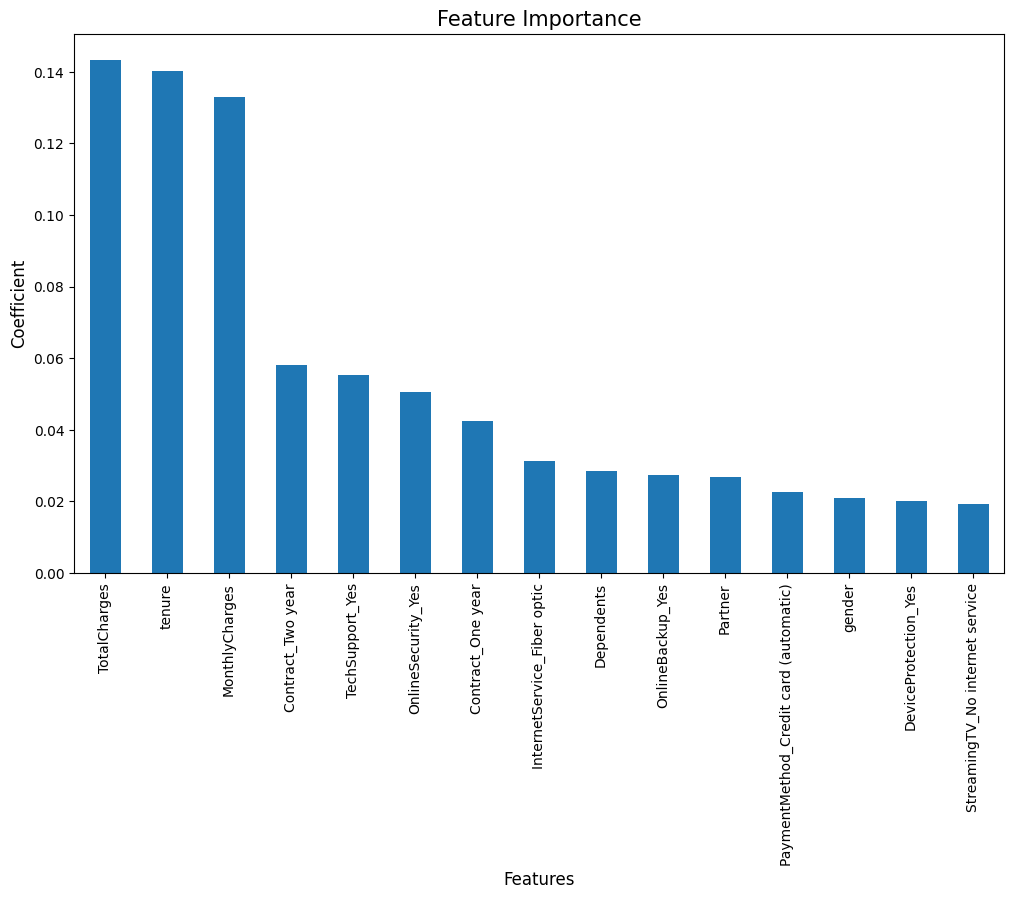

In [85]:
fig = plt.figure(figsize=(12,7))
feature_importances_rfc_df.nlargest(15).plot(kind='bar')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()

* **`TotalCharges` is the most important feature.**

# **Cross Validation and Hyperparameter Tuning**

# **`Logistic Regression model`**

In [86]:
from sklearn.model_selection import GridSearchCV

penalties =['l1','l2','elasticnet','none']

# hyperparameter c
c=[0.001,0.1,0.5,1,5,10]

# hyperparameter grid
param_dict={'penalty':penalties,
            'max_iter':[100,1000,2000],
            'C': c}

In [87]:
# creating instance of logistic regression
logi = LogisticRegression()

# Grid search
logi_grid = GridSearchCV(estimator=logi,
                         param_grid=param_dict,
                         cv=5,
                         verbose=3,n_jobs=-1,scoring='roc_auc')

# fitting model
logi_grid.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 0.5, 1, 5, 10],
                         'max_iter': [100, 1000, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='roc_auc', verbose=3)

In [88]:
logi_grid.best_estimator_

LogisticRegression(C=1)

In [89]:
logi_grid.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [90]:
logi_optimal_model=logi_grid.best_estimator_

In [91]:
#class prediction of y on train and test
y_pred_logi_grid = logi_optimal_model.predict(X_test)
y_train_pred_logi_grid = logi_optimal_model.predict(X_train)

In [92]:
#getting all scores for Logistic Regression after CV and Hyperparameter Tunning
train_accuracy_logi_grid = round(accuracy_score(y_train_pred_logi_grid,y_train), 3)
accuracy_logi_grid = round(accuracy_score(y_pred_logi_grid,y_test), 3)
precision_score_logi_grid = round(precision_score(y_pred_logi_grid, y_test), 3)
recall_score_logi_grid = round(recall_score(y_pred_logi_grid,y_test), 3)
f1_score_logi_grid = round(f1_score(y_pred_logi_grid,y_test), 3)
auc_logi_grid = round(roc_auc_score(y_pred_logi_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi_grid)
print("The accuracy on test data is ", accuracy_logi_grid)
print("The precision on test data is ", precision_score_logi_grid)
print("The recall on test data is ", recall_score_logi_grid)
print("The f1 on test data is ", f1_score_logi_grid)
print("The auc on test data is ", auc_logi_grid)

The accuracy on train data is  0.837
The accuracy on test data is  0.834
The precision on test data is  0.845
The recall on test data is  0.826
The f1 on test data is  0.836
The auc on test data is  0.835


# **`Decision Trees`**

In [93]:
# The maximum depth of the tree
depth_of_tree = [20,25,30]

# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]

# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [94]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
dtc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             scoring='roc_auc', verbose=3)

In [95]:
dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=30, min_samples_leaf=40,
                       min_samples_split=0.01)

In [96]:
dtc_grid.best_params_

{'max_depth': 30, 'min_samples_leaf': 40, 'min_samples_split': 0.01}

In [97]:
dtc_optimal_model = dtc_grid.best_estimator_

In [98]:
#class prediction of y on train and test
y_pred_dtc_grid=dtc_optimal_model.predict(X_test)
y_train_pred_dtc_grid=dtc_optimal_model.predict(X_train)

In [99]:
#getting all scores for decision tree after CV and Hyperparameter Tunning
train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train), 3)
accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test), 3)
precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid,y_test), 3)
recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test), 3)
f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test), 3)
auc_dtc_grid = round(roc_auc_score(y_pred_dtc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc_grid)
print("The accuracy on test data is ", accuracy_dtc_grid)
print("The precision on test data is ", precision_score_dtc_grid)
print("The recall on test data is ", recall_score_dtc_grid)
print("The f1 on test data is ", f1_score_dtc_grid)
print("The auc on test data is ", auc_dtc_grid)

The accuracy on train data is  0.831
The accuracy on test data is  0.811
The precision on test data is  0.844
The recall on test data is  0.791
The f1 on test data is  0.817
The auc on test data is  0.813


# **`Random Forest`**

In [100]:
# number of tress
n_estimators=[100,150,200]

# max depth of trees
max_depth=[10,20,30]

# minimum number of samples required to split a node
min_samples_split=[50,100,200]

# min number of samples required at each leaf
min_samples_leaf=[40,50]

# hyper parameter grid
param_dict={'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            }

In [101]:
# creating insatnce for random forest classifier
rfc= RandomForestClassifier()

# grid search
rfc_grid=GridSearchCV(estimator=rfc,
                      param_grid=param_dict,
                      cv=5,
                      verbose=3,
                      scoring='roc_auc',
                      n_jobs=-1)

# fitting the model
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 200],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc', verbose=3)

In [102]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=200)

In [103]:
rfc_grid.best_params_

{'max_depth': 30,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 200}

In [104]:
rfc_optimal_model = rfc_grid.best_estimator_

In [105]:
#class prediction of y on train and test
y_pred_rfc_grid=rfc_optimal_model.predict(X_test)
y_train_pred_rfc_grid=rfc_optimal_model.predict(X_train)

In [106]:
#getting all scores for Random Forest Classifier after CV and Hyperparameter Tunning
train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train), 3)
accuracy_rfc_grid = round(accuracy_score(y_pred_rfc_grid,y_test), 3)
precision_score_rfc_grid = round(precision_score(y_pred_rfc_grid,y_test), 3)
recall_score_rfc_grid = round(recall_score(y_pred_rfc_grid,y_test), 3)
f1_score_rfc_grid = round(f1_score(y_pred_rfc_grid,y_test), 3)
auc_rfc_grid = round(roc_auc_score(y_pred_rfc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc_grid)
print("The accuracy on test data is ", accuracy_rfc_grid)
print("The precision on test data is ", precision_score_rfc_grid)
print("The recall on test data is ", recall_score_rfc_grid)
print("The f1 on test data is ", f1_score_rfc_grid)
print("The auc on test data is ", auc_rfc_grid)

The accuracy on train data is  0.829
The accuracy on test data is  0.819
The precision on test data is  0.854
The recall on test data is  0.798
The f1 on test data is  0.825
The auc on test data is  0.821


# **`Gradient Boosting`**

In [107]:
# to shrinks the contribution of each tree by learning_rate
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'learning_rate': learning_rates,
              'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [108]:
from sklearn.model_selection import RandomizedSearchCV

# Create an instance of the RandomForestClassifier
gbc = GradientBoostingClassifier(random_state=42)

# Grid search
gbc_grid = RandomizedSearchCV(estimator=gbc,
                       param_distributions = param_dict,
                       cv = 2, verbose=2, scoring='roc_auc')
# fitting model
gbc_grid.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END learning_rate=0.05, max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   3.6s
[CV] END learning_rate=0.05, max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   3.9s
[CV] END learning_rate=1, max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   3.3s
[CV] END learning_rate=1, max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   3.5s
[CV] END learning_rate=1, max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   2.3s
[CV] END learning_rate=1, max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   3.2s
[CV] END learning_rate=0.1, max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=200; total time=   6.0s
[CV] END learning_rate=0.1, max_depth=30, min_samples_leaf=50, min_samples_split=50, n_

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [100, 150, 200]},
                   scoring='roc_auc', verbose=2)

In [109]:
gbc_grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=10,
                           min_samples_leaf=50, min_samples_split=100,
                           n_estimators=150, random_state=42)

In [110]:
gbc_grid.best_params_

{'n_estimators': 150,
 'min_samples_split': 100,
 'min_samples_leaf': 50,
 'max_depth': 10,
 'learning_rate': 0.05}

In [111]:
gbc_optimal_model = gbc_grid.best_estimator_

In [112]:
#class prediction of y on train and test
y_pred_gbc_grid=gbc_optimal_model.predict(X_test)
y_train_pred_gbc_grid=gbc_optimal_model.predict(X_train)

In [113]:
#getting all scores for Gradient Boosting after CV and Hyperparameter Tunning
train_accuracy_gbc_grid = round(accuracy_score(y_train_pred_gbc_grid,y_train), 3)
accuracy_gbc_grid = round(accuracy_score(y_pred_gbc_grid,y_test), 3)
precision_score_gbc_grid = round(precision_score(y_pred_gbc_grid,y_test), 3)
recall_score_gbc_grid = round(recall_score(y_pred_gbc_grid,y_test), 3)
f1_score_gbc_grid = round(f1_score(y_pred_gbc_grid,y_test), 3)
auc_gbc_grid = round(roc_auc_score(y_pred_gbc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc_grid)
print("The accuracy on test data is ", accuracy_gbc_grid)
print("The precision on test data is ", precision_score_gbc_grid)
print("The recall on test data is ", recall_score_gbc_grid)
print("The f1 on test data is ", f1_score_gbc_grid)
print("The auc on test data is ", auc_gbc_grid)

The accuracy on train data is  0.911
The accuracy on test data is  0.842
The precision on test data is  0.856
The recall on test data is  0.832
The f1 on test data is  0.844
The auc on test data is  0.842


# **`XG Boosting`**

In [114]:
# Hyperparameter Grid
param_dict = {'learning_rate': [0.15, 0.1, 0.05],
              'n_estimators' : [200, 250],
              'max_depth' : [15,20,25],
              'min_child_weight' : [1,3],
              'gamma': [0.3, 0.2, 0.1],
              'min_samples_leaf' : [40, 50]}

In [115]:
# Create an instance of the RandomForestClassifier
xgb = XGBClassifier()

# Grid search
xgb_grid = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict,
                       n_jobs=-1, n_iter=5, cv = 3,
                       verbose=2, scoring='roc_auc')
# fitting model
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:13:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.3, 0.2, 0.1],
                                        'learning_rate': [0.15, 0.1, 0.05],
                                        'max_depth': [15, 20, 25],
                                        'min_child_weight': [1, 3],
                                        'min_samples_leaf': [40, 50],
                                        'n_estimators': [200, 250]},
                   scoring='roc_auc', verbose=2)

In [116]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=3, min_samples_leaf=40, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [117]:
xgb_grid.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 40,
 'min_child_weight': 3,
 'max_depth': 20,
 'learning_rate': 0.05,
 'gamma': 0.3}

In [118]:
xgb_optimal_model = xgb_grid.best_estimator_

In [119]:
#class prediction of y on train and test
y_pred_xgb_grid=xgb_optimal_model.predict(X_test)
y_train_pred_xgb_grid=xgb_optimal_model.predict(X_train)

In [120]:
#getting all scores for XG Boosting after CV and Hyperparameter Tunning
train_accuracy_xgb_grid = round(accuracy_score(y_train_pred_xgb_grid,y_train), 3)
accuracy_xgb_grid = round(accuracy_score(y_pred_xgb_grid,y_test), 3)
precision_score_xgb_grid = round(precision_score(y_pred_xgb_grid,y_test), 3)
recall_score_xgb_grid = round(recall_score(y_pred_xgb_grid,y_test), 3)
f1_score_xgb_grid = round(f1_score(y_pred_xgb_grid,y_test), 3)
auc_xgb_grid = round(roc_auc_score(y_pred_xgb_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb_grid)
print("The accuracy on test data is ", accuracy_xgb_grid)
print("The precision on test data is ", precision_score_xgb_grid)
print("The recall on test data is ", recall_score_xgb_grid)
print("The f1 on test data is ", f1_score_xgb_grid)
print("The auc on test data is ", auc_xgb_grid)

The accuracy on train data is  0.967
The accuracy on test data is  0.833
The precision on test data is  0.843
The recall on test data is  0.826
The f1 on test data is  0.834
The auc on test data is  0.833


# **Final Model Comparison**

In [121]:
grid_classifiers = ['Optimal Logistic Regression', 'Optimal Decision Tree', 'Optimal Random Forest', 'Optimal Gradient Boosting', 'Optimal XG Boosting']
grid_train_accuracy = [train_accuracy_logi_grid, train_accuracy_dtc_grid, train_accuracy_rfc_grid, train_accuracy_gbc_grid, train_accuracy_xgb_grid]
grid_test_accuracy = [accuracy_logi_grid, accuracy_dtc_grid, accuracy_rfc_grid, accuracy_gbc_grid, accuracy_xgb_grid]
grid_precision_score = [precision_score_logi_grid, precision_score_dtc_grid, precision_score_rfc_grid,precision_score_gbc_grid, precision_score_xgb_grid]
grid_recall_score = [recall_score_logi_grid, recall_score_dtc_grid, recall_score_rfc_grid,  recall_score_gbc_grid, recall_score_xgb_grid]
grid_f1_score = [f1_score_logi_grid, f1_score_dtc_grid, f1_score_rfc_grid, f1_score_gbc_grid, f1_score_xgb_grid]
grid_auc_score = [auc_logi_grid, auc_dtc_grid, auc_rfc_grid,  auc_gbc_grid, auc_xgb_grid]

In [122]:
grid_compare_df = pd.DataFrame({'Classifier':grid_classifiers, 'Train Accuracy': grid_train_accuracy, 'Test Accuracy': grid_test_accuracy, 'Precision': grid_precision_score, 'Recall': grid_recall_score, 'F1 Score': grid_f1_score , 'AUC': grid_auc_score})

In [123]:
all_comparision_df = pd.concat([compare_df, grid_compare_df]).reset_index()

In [124]:
all_comparision_df.drop('index', axis=1, inplace=True)

In [125]:
all_comparision_df.sort_values('AUC', axis=0, ascending=False, inplace=True)

In [126]:
all_comparision_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
8,Optimal Gradient Boosting,0.911,0.842,0.856,0.832,0.844,0.842
2,Random Forest,0.999,0.837,0.843,0.833,0.838,0.837
0,Logistic Regression,0.837,0.834,0.845,0.826,0.836,0.835
5,Optimal Logistic Regression,0.837,0.834,0.845,0.826,0.836,0.835
4,XG Boosting,0.958,0.833,0.838,0.829,0.833,0.833
9,Optimal XG Boosting,0.967,0.833,0.843,0.826,0.834,0.833
3,Gradient Boosting,0.851,0.830,0.857,0.811,0.834,0.831
7,Optimal Random Forest,0.829,0.819,0.854,0.798,0.825,0.821
6,Optimal Decision Tree,0.831,0.811,0.844,0.791,0.817,0.813
1,Decision Tree,0.999,0.797,0.808,0.789,0.798,0.797


In [127]:
import pickle

with open('model.pkl', 'wb') as file:
  pickle.dump(xgb, file)

# **Summary and conclusions**

* We trained 5 unique Machine Learning models using the training dataset, and the its respective performance was improved through hyperparameter tuning.

* We initially started with the decision tree model, mainly because it is easily explainable to the stakeholders, and its low training time.

* Once we were successfully able to fit a decision tree, it was necessary to improve the prediction accuracy, and reduce errors in the predictions.

* To achieve this, we fit a random forest model on the training data, and the final predictions showed less errors compared to that of decision tree model.

* To further improve the predictions of the model, we fit 2 boosting models namely; Gradient boosting machine (GBM) and Extreme gradient boost (XG Boost).

* The predictions obtained from these models showed errors in the same range, but the errors were lower than that of decision tree model.

* Plotted the ROC curve and it showed that RandomForestClassifier coverrs the highest area compared to other models.

* implemnted Hyper Parameter tuning to all the models.

* Optimal Gradient Boosting gave a good recall overall.

* since the criteria of selecting the best model i kept was AUC and **`Random Forest`** gave the highest AUC of **`85.1%`**.

Final choice of model depends on:

* If it is absolutely necessary to have a model with the best test accuracy, then RandomForestClassifier  will be the best choice, since it has the highest test score than other models built.

* But when it comes to AUC Optimal XG Boosting beats all the model and hence we gave highest priority.

* But as discussed above, higher the model complexity, lower is the model explainability. Hence if the predictions must be explained to stakeholers, then XG Boost is not an ideal choice.

* In this case decision tree can be used, since they are easier to explain. By choosing a simpler model, we will be compromising with the model accuracy (Accuracy vs Interpretability tradeoff).

* `TotalCharges` turned out to be most important feature of our final model.

*Thankyou for visting my project till last.*